# Intro

SWTLoc is a text localization library implementing the work of [Boris Epshtein, Eyal Ofek & Yonatan Wexler
(June, 2010)](https://www.microsoft.com/en-us/research/publication/detecting-text-in-natural-scenes-with-stroke-width-transform/).

This library extends the transformation of the image for textual content by giving the ability to :

- Localize `Letter`'s : through `SWTImage.localizeLetters`
- Localize `Words`'s, via fusing individual `Letter`'s : through `SWTImage.localizeWords`

The process flow of is depicted in the image below : 

![Process Flow](../swtloc/static/SWTLoc_Process_Flow.png "Process Flow")


# Installation

In [ ]:
# !pip install swtloc

# Imports

In [1]:
import sys
sys.path.append('../')

# For READEME.md

## Usage

**Initialise the `SWTLocalizer` class**

In [ ]:
import swtloc as swt
from swtloc.configs import (IMAGE_ORIGINAL,
                            IMAGE_GRAYSCALE,
                            IMAGE_EDGED,
                            IMAGE_SWT_TRANSFORMED,
                            IMAGE_CONNECTED_COMPONENTS_1C,
                            IMAGE_CONNECTED_COMPONENTS_3C,
                            IMAGE_CONNECTED_COMPONENTS_3C_WITH_PRUNED_ELEMENTS,
                            IMAGE_CONNECTED_COMPONENTS_PRUNED_1C,
                            IMAGE_CONNECTED_COMPONENTS_PRUNED_3C,
                            IMAGE_PRUNED_3C_LETTER_LOCALIZATIONS,
                            IMAGE_ORIGINAL_LETTER_LOCALIZATIONS,
                            IMAGE_ORIGINAL_MASKED_LETTER_LOCALIZATIONS,
                            IMAGE_PRUNED_3C_WORD_LOCALIZATIONS,
                            IMAGE_ORIGINAL_WORD_LOCALIZATIONS,
                            IMAGE_ORIGINAL_MASKED_WORD_LOCALIZATIONS,
                            IMAGE_INDIVIDUAL_LETTER_LOCALIZATION,
                            IMAGE_ORIGINAL_INDIVIDUAL_LETTER_LOCALIZATION,
                            IMAGE_INDIVIDUAL_WORD_LOCALIZATION,
                            IMAGE_ORIGINAL_INDIVIDUAL_WORD_LOCALIZATION)

print('Using SWTLoc Version : ', swt.__version__)

imgpath = 'images/test_image_4/test_img4.jpeg'
respath = 'images/test_image_4/usage_results/'

In [ ]:
swtl = swt.SWTLocalizer(image_paths=imgpath)
swtImgObj = swtl.swtimages[0]
print(swtImgObj, type(swtImgObj))
swtImgObj.showImage()
swtImgObj.showImage(save_fig=True, save_dir=respath, dpi=300)

### Apply Transformations

In [ ]:
swt_mat = swtImgObj.transformImage(text_mode='lb_df',
                                   auto_canny_sigma=1.0,
                                   maximum_stroke_width=20)

swtImgObj.showImage(image_codes=[IMAGE_ORIGINAL, IMAGE_GRAYSCALE, IMAGE_EDGED, IMAGE_SWT_TRANSFORMED],
                    plot_title='SWT', plot_sup_title=f'\nTransform Time - {swtImgObj.transform_time}',
                    save_fig=True, save_dir=respath, dpi=300)

### Find and Prune Connected Components

In [ ]:
image_1C, pruned_image_1C = swtImgObj.findAndPruneConnectedComponents(minimum_pixels_per_cc=50,
                                                                      maximum_pixels_per_cc=10_000,
                                                                      acceptable_aspect_ratio=0.2)

swtImgObj.showImage(image_codes=[IMAGE_SWT_TRANSFORMED,
                                 IMAGE_CONNECTED_COMPONENTS_3C,
                                 IMAGE_CONNECTED_COMPONENTS_3C_WITH_PRUNED_ELEMENTS,
                                 IMAGE_CONNECTED_COMPONENTS_PRUNED_3C],
                           plot_title='Find & Prune Connected Components\n',
                           plot_sup_title=r'SWT$\Rightarrow$Connected Components$\Rightarrow$Connected '
                                          r'Components+Pruning$\Rightarrow$After Pruning',
                        save_fig=True, save_dir=respath, dpi=300)

### Localizing Letters

In [ ]:
localized_letters = swtImgObj.localizeLetters()

swtImgObj.showImage(image_codes=[IMAGE_PRUNED_3C_LETTER_LOCALIZATIONS,
                                 IMAGE_ORIGINAL_LETTER_LOCALIZATIONS,
                                 IMAGE_ORIGINAL_MASKED_LETTER_LOCALIZATIONS],
                     plot_title='Letter Localizations\n',
                     plot_sup_title=rf"Localization Method : ${swtImgObj.cfg['swtimage.localizeletters.localize_by']}$",
                     save_fig=True, save_dir=respath, dpi=300)
letter_labels = list([int(k) for k in localized_letters.keys()])

In [ ]:
letter_label = letter_labels[3]
locletter = swtImgObj.getLetter(key=letter_label)

swtImgObj.showImage(image_codes=[IMAGE_INDIVIDUAL_LETTER_LOCALIZATION ,
                                 IMAGE_ORIGINAL_INDIVIDUAL_LETTER_LOCALIZATION ],
                     plot_title='Letter Localizations\n',
                     plot_sup_title=rf"Localization Method : ${swtImgObj.cfg['swtimage.localizeletters.localize_by']}$",
                     save_fig=True, save_dir=respath, dpi=300)

### Localize Words

In [ ]:
localized_words = swtImgObj.localizeWords()

swtImgObj.showImage(image_codes=[IMAGE_PRUNED_3C_WORD_LOCALIZATIONS,
                                 IMAGE_ORIGINAL_WORD_LOCALIZATIONS,
                                 IMAGE_ORIGINAL_MASKED_WORD_LOCALIZATIONS],
                    plot_title='Word Localizations\n',
                    plot_sup_title=rf"Localization Method : ${swtImgObj.cfg['swtimage.localizewords.localize_by']}$",
                    save_fig=True, save_dir=respath, dpi=300)
word_labels = list([int(k) for k in localized_words.keys()])

In [ ]:
word_label = word_labels[12]
locword = swtImgObj.getWord(key=word_label)

swtImgObj.showImage(image_codes=[IMAGE_INDIVIDUAL_WORD_LOCALIZATION ,
                                 IMAGE_ORIGINAL_INDIVIDUAL_WORD_LOCALIZATION],
                     plot_title='Word Localizations\n',
                     plot_sup_title=rf"Localization Method : ${swtImgObj.cfg['swtimage.localizewords.localize_by']}$",
                     save_fig=True, save_dir=respath, dpi=300)

### Show the Images & Save the Images

In [ ]:
swtImgObj.showImage(image_codes=[IMAGE_ORIGINAL,
                                 IMAGE_ORIGINAL_MASKED_WORD_LOCALIZATIONS],
                    plot_title='Original & Bubble Mask')

In [ ]:
swtImgObj.showImage(image_codes=[IMAGE_ORIGINAL,
                                 IMAGE_ORIGINAL_MASKED_WORD_LOCALIZATIONS],
                    plot_title='Original & Bubble Mask',
                    save_fig=True, save_dir=respath)

### Save the crops

**Save Letter Crops**

In [ ]:
swtImgObj.saveCrop(save_path=respath, crop_of='letters', crop_key=4, crop_type='min_bbox', crop_on=IMAGE_ORIGINAL)
swtImgObj.saveCrop(save_path=respath, crop_of='letters', crop_key=4, crop_type='min_bbox', crop_on=IMAGE_SWT_TRANSFORMED)

**Save Word Crops**

In [ ]:
swtImgObj.saveCrop(save_path=respath, crop_of='words', crop_key=13, crop_type='bubble', crop_on=IMAGE_ORIGINAL)
swtImgObj.saveCrop(save_path=respath, crop_of='words', crop_key=13, crop_type='bubble', crop_on=IMAGE_SWT_TRANSFORMED)

## Frequenctly Used Code Snippets

### Performing Stroke Width Transformation

In [16]:
%load_ext autoreload
%autoreload 2
import swtloc as swt
from swtloc.configs import (IMAGE_ORIGINAL,
                            IMAGE_GRAYSCALE,
                            IMAGE_EDGED,
                            IMAGE_SWT_TRANSFORMED)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Using SWTLoc Version :  2.0.0


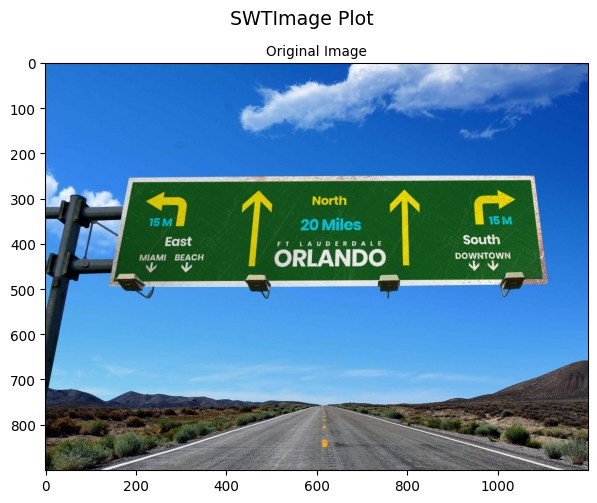

In [30]:
# Installation
# !pip install swtloc
# Imports
import swtloc as swt
from swtloc.configs import (IMAGE_ORIGINAL,
                            IMAGE_GRAYSCALE,
                            IMAGE_EDGED,
                            IMAGE_SWT_TRANSFORMED)
# Image Path
imgpath = 'images/test_image_5/test_img5.jpg'
# Result Path
respath = 'images/test_image_5/usage_results/'
# Initializing the SWTLocalizer class with the image path
swtl = swt.SWTLocalizer(image_paths=imgpath)
# Accessing the SWTImage Object which is housing this image
swtImgObj = swtl.swtimages[0]
swtImgObj.showImage()

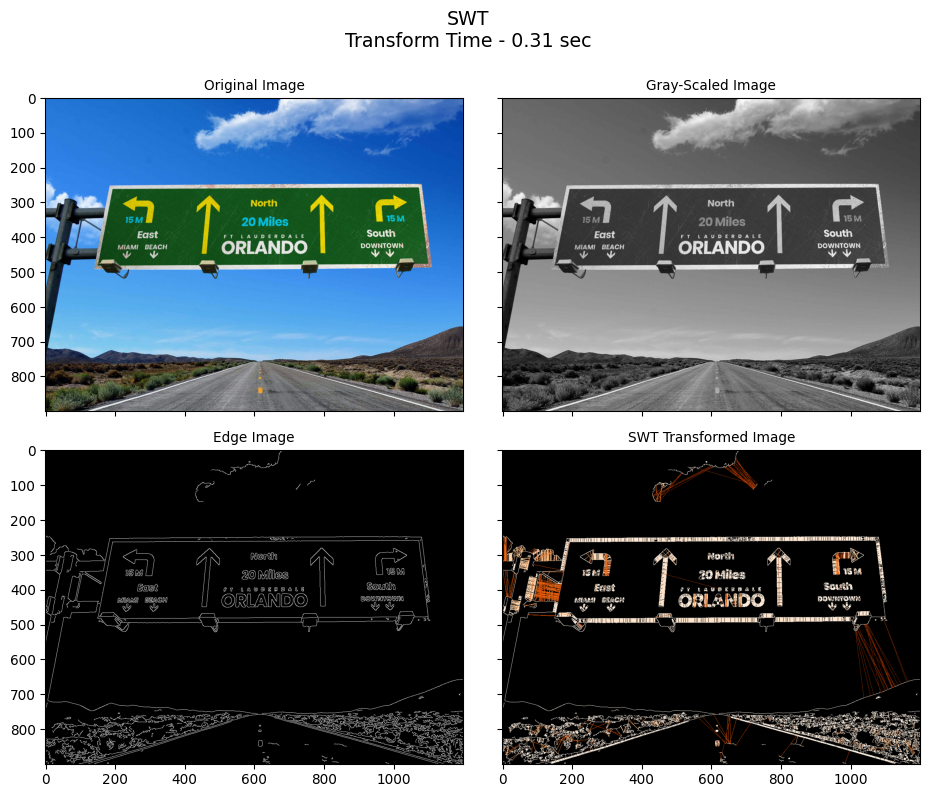

In [31]:
# Performing Stroke Width Transformation
swt_mat = swtImgObj.transformImage(text_mode='db_lf')

**Generating the Images**

In [32]:
savepath = swtImgObj.showImage(image_codes=[IMAGE_ORIGINAL], save_fig=True, save_dir=respath, dpi=300)

In [35]:
savepath = swtImgObj.showImage(image_codes=[IMAGE_ORIGINAL, IMAGE_GRAYSCALE, IMAGE_EDGED, IMAGE_SWT_TRANSFORMED],
                                plot_title='SWT', plot_sup_title=f'\nTransform Time - {swtImgObj.transform_time}',
                                save_fig=True, save_dir=respath, dpi=300)

### Localizing & Annotating Letters and Generating Crops of Letters

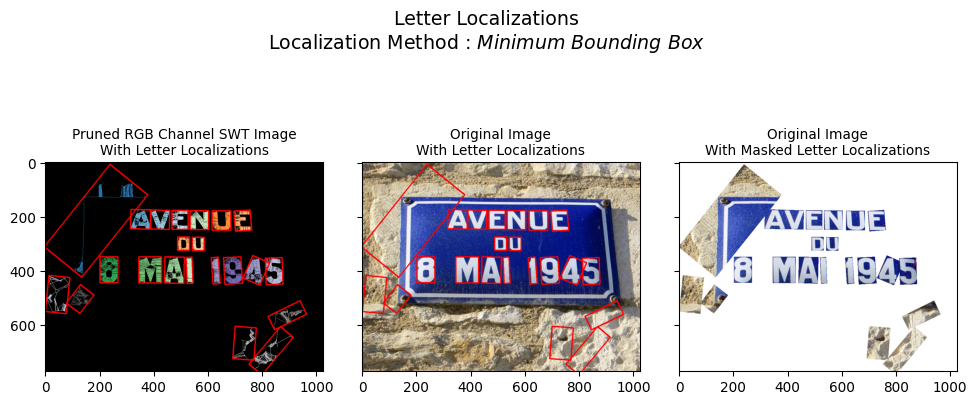

In [59]:
# Installation
# !pip install swtloc
# Imports
import swtloc as swt
from cv2 import cv2
from swtloc.configs import (IMAGE_ORIGINAL,
                            IMAGE_GRAYSCALE,
                            IMAGE_EDGED,
                            IMAGE_SWT_TRANSFORMED)
# Image Path
imgpath = 'images/test_image_1/test_img1.jpg'
# Read the image
img = cv2.imread(imgpath)
# Result Path
respath = 'images/test_image_1/usage_results/'
# Initializing the SWTLocalizer class with a pre loaded image
swtl = swt.SWTLocalizer(images=img)
swtImgObj = swtl.swtimages[0]
# Perform Stroke Width Transformation
swt_mat = swtImgObj.transformImage(text_mode='db_lf',
                                   maximum_angle_deviation=np.pi/2,
                                   gaussian_blurr_kernel=(11, 11),
                                   minimum_stroke_width=5,
                                   maximum_stroke_width=50,
                                   display=False)  # NOTE: Set display=True 
# Find And Prune Connected Components <- Finding Letters
image_cc, pruned_image_cc = swtImgObj.findAndPruneConnectedComponents(minimum_pixels_per_cc=950,
                                                                      maximum_pixels_per_cc=5200,
                                                                      display=False)  # NOTE: Set display=True 
# Calculate and Draw Letter Annotations
localized_letters = swtImgObj.localizeLetters()
letter_labels = [int(k) for k in list(localized_letters.keys())]

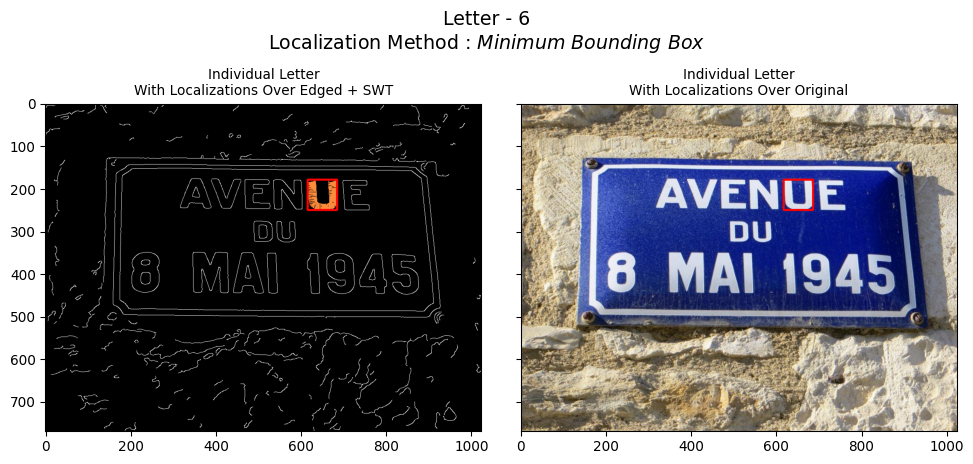

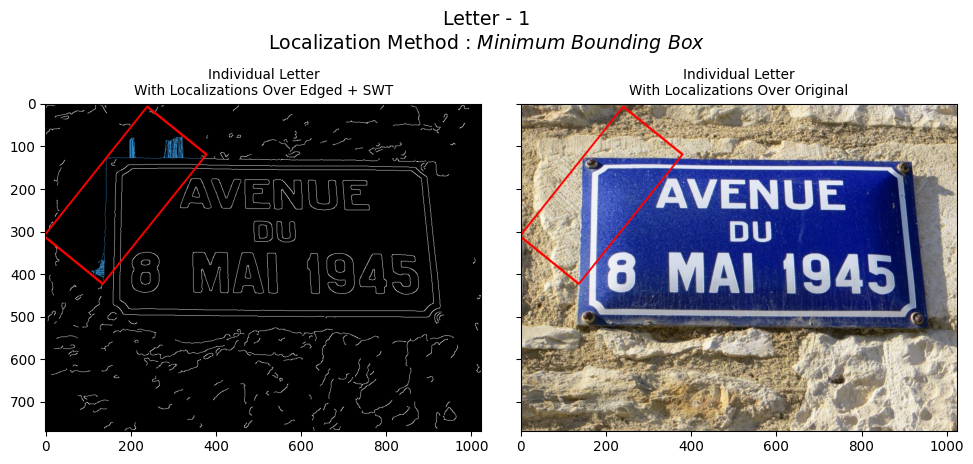

In [68]:
# Some Other Helpful Letter related functions
# # Query a single letter
loc_letter, swt_loc, orig_loc = swtImgObj.getLetter(key=letter_labels[5])

# # Iterating over all the letters
# # Specifically useful for jupyter notebooks - Iterate over all
# # the letters, at the same time visualizing the localizations
letter_gen = swtImgObj.letterIterator()
loc_letter, swt_loc, orig_loc = next(letter_gen)

# # Generating a crop of a single letter on any of the available
# # image codes
# # Crop on SWT Image
swtImgObj.saveCrop(save_path=respath,crop_of='letters',crop_key=6, crop_on=IMAGE_SWT_TRANSFORMED, crop_type='min_bbox')
# # Crop on Original Image
swtImgObj.saveCrop(save_path=respath,crop_of='letters',crop_key=6, crop_on=IMAGE_ORIGINAL, crop_type='min_bbox')

**Generating the Images**

In [65]:
from swtloc.configs import (IMAGE_PRUNED_3C_LETTER_LOCALIZATIONS,
                            IMAGE_ORIGINAL_LETTER_LOCALIZATIONS,
                            IMAGE_ORIGINAL_MASKED_LETTER_LOCALIZATIONS)

savepath = swtImgObj.showImage(image_codes=[IMAGE_PRUNED_3C_LETTER_LOCALIZATIONS,
                                         IMAGE_ORIGINAL_LETTER_LOCALIZATIONS,
                                         IMAGE_ORIGINAL_MASKED_LETTER_LOCALIZATIONS],
                             plot_title='Letter Localizations\n',
                             plot_sup_title=rf"Localization Method : ${swtImgObj.cfg['swtimage.localizeletters.localize_by']}$",
                             save_fig=True, save_dir=respath, dpi=300)

### Localizing & Annotating Words and Generating Crops of Words

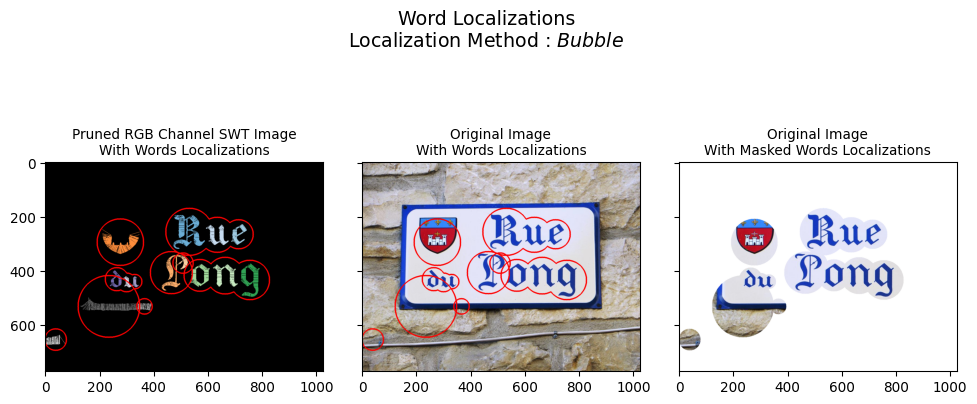

In [98]:
# Installation
# !pip install swtloc
# Imports
import swtloc as swt
from cv2 import cv2
from swtloc.configs import (IMAGE_ORIGINAL,
                            IMAGE_GRAYSCALE,
                            IMAGE_EDGED,
                            IMAGE_SWT_TRANSFORMED)
# Image Path
imgpath = 'images/test_image_2/test_img2.jpg'
# Result Path
respath = 'images/test_image_2/usage_results/'
# Initializing the SWTLocalizer class with the image path
swtl = swt.SWTLocalizer(image_paths=imgpath)
swtImgObj = swtl.swtimages[0]
# Perform Stroke Width Transformation
swt_mat = swtImgObj.transformImage(maximum_angle_deviation=np.pi/2,
                                   gaussian_blurr_kernel=(9, 9),
                                   minimum_stroke_width=3,
                                   maximum_stroke_width=50,
                                   include_edges_in_swt=False,
                                   display=False)  # NOTE: Set display=True 
# Find And Prune Connected Components <- Finding Letters
image_cc, pruned_image_cc = swtImgObj.findAndPruneConnectedComponents(minimum_pixels_per_cc=400,
                                                                      maximum_pixels_per_cc=6000,
                                                                      display=False)  # NOTE: Set display=True 

# Calculate and Draw Letter Annotations
localized_letters = swtImgObj.localizeLetters(display=False)  # NOTE: Set display=True 

# Calculate and Draw Words Annotations
localized_words = swtImgObj.localizeWords(display=True)  # NOTE: Set display=True 
word_labels = [int(k) for k in list(localized_words.keys())]

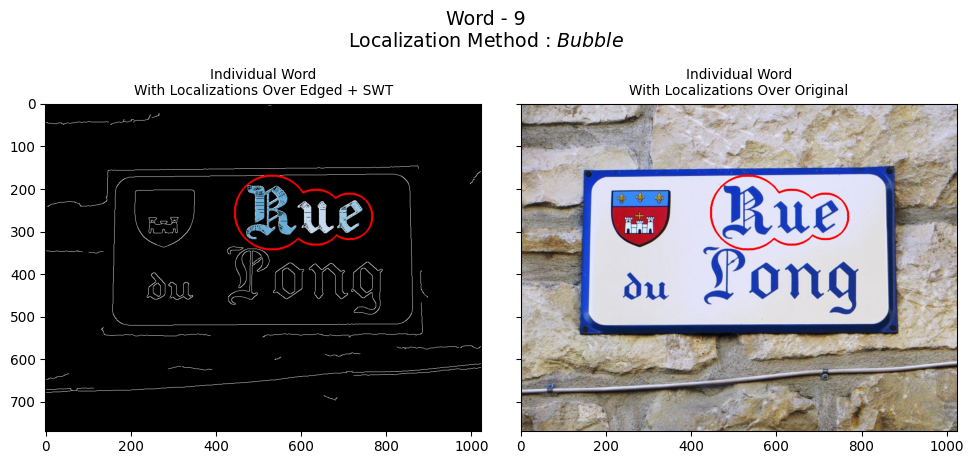

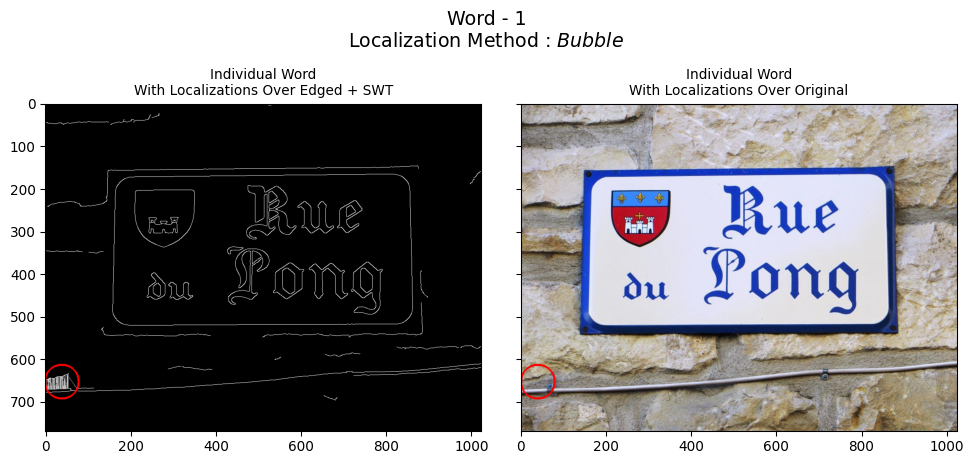

In [102]:
# Some Other Helpful Words related functions
# # Query a single word
loc_word, swt_loc, orig_loc = swtImgObj.getWord(key=word_labels[8])

# # Iterating over all the words
# # Specifically useful for jupyter notebooks - Iterate over all
# # the words, at the same time visualizing the localizations
word_gen = swtImgObj.wordIterator()
loc_word, swt_loc, orig_loc = next(word_gen)

# # Generating a crop of a single word on any of the available
# # image codes
# # Crop on SWT Image
swtImgObj.saveCrop(save_path=respath, crop_of='words', crop_key=9, crop_on=IMAGE_SWT_TRANSFORMED, crop_type='bubble')
# # Crop on Original Image
swtImgObj.saveCrop(save_path=respath, crop_of='words', crop_key=9, crop_on=IMAGE_ORIGINAL, crop_type='bubble')

**Generating Images**

In [103]:
from swtloc.configs import (IMAGE_PRUNED_3C_WORD_LOCALIZATIONS,
                             IMAGE_ORIGINAL_WORD_LOCALIZATIONS,
                             IMAGE_ORIGINAL_MASKED_WORD_LOCALIZATIONS)

savepath = swtImgObj.showImage(image_codes=[IMAGE_PRUNED_3C_WORD_LOCALIZATIONS,
                                 IMAGE_ORIGINAL_WORD_LOCALIZATIONS,
                                 IMAGE_ORIGINAL_MASKED_WORD_LOCALIZATIONS],
                    plot_title='Word Localizations\n',
                    plot_sup_title=rf"Localization Method : ${swtImgObj.cfg['swtimage.localizewords.localize_by']}$",
                    save_fig=True, save_dir=respath, dpi=300)

# Random Testing Space

In [8]:
from cv2 import cv2

In [104]:
cv2.imread(savepath).shape

(1650, 3600, 3)

In [67]:
1650/4

412.5